In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv(r"C:\Users\MF\Downloads\Datasets\Datasets\Superstore Sales Dataset.csv")
print("Initial shape of dataset:", df.shape)
print("\nFirst few rows:")
print(df.head())

Initial shape of dataset: (9800, 18)

First few rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida 

In [4]:
# 2. Initial Data Exploration
print("\n2. Initial Data Exploration")
print("-------------------------")
print("\nDataset Info:")
print(df.info())


2. Initial Data Exploration
-------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-nu

In [5]:
# Check missing values
print("\n DATA CLEANING")
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


 DATA CLEANING

Missing Values:
Postal Code    11
dtype: int64


In [6]:
# First, let's examine the rows with missing Postal Codes
print("Rows with Missing Postal Codes:")
print(df[df['Postal Code'].isnull()][['City', 'State', 'Postal Code', ]])

Rows with Missing Postal Codes:
            City    State  Postal Code
2234  Burlington  Vermont          NaN
5274  Burlington  Vermont          NaN
8798  Burlington  Vermont          NaN
9146  Burlington  Vermont          NaN
9147  Burlington  Vermont          NaN
9148  Burlington  Vermont          NaN
9386  Burlington  Vermont          NaN
9387  Burlington  Vermont          NaN
9388  Burlington  Vermont          NaN
9389  Burlington  Vermont          NaN
9741  Burlington  Vermont          NaN


In [7]:
# 2. Analyze patterns in missing data
missing_postal_analysis = df[df['Postal Code'].isnull()].groupby(['City', 'State']).size().reset_index(name='count')
print("\nMissing Postal Codes by City and State:")
print(missing_postal_analysis)


Missing Postal Codes by City and State:
         City    State  count
0  Burlington  Vermont     11


In [8]:
# Convert 'Postal Code' to string
df['Postal Code'] =df['Postal Code'].astype(str)

In [9]:
""" 
    Handle missing values (if needed)
    we have got the postal code of the city from google maps
"""
df.loc[(df['City'] == 'Burlington')& (df['State'] == 'Vermont'), 'Postal Code'] = '05401'

In [10]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [11]:
#check for duplicated rows
duplicates = df.duplicated().sum()
print("\n num of duplicated rows:",duplicates)


 num of duplicated rows: 0


In [12]:
#data type check
print('\current data types:')
print(df.dtypes)

\current data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [13]:
#convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [14]:
#we here will check d types again
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [15]:
#Here we check for the consistency on categories and sub_categories
print('\n Unique Categories:')
print(df['Category'].unique())
print('\n Unique Sub-Categories:')
print(df['Sub-Category'].unique())


 Unique Categories:
['Furniture' 'Office Supplies' 'Technology']

 Unique Sub-Categories:
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [16]:
print('\n FEATUER ENGINEERING')
print('-' * 50)


 FEATUER ENGINEERING
--------------------------------------------------


In [17]:
# Add time-based features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Quarter,Shipping Days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,4,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,4,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,4,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,4,7


In [19]:
# 5. SALES ANALYSIS
print("\n5. SALES ANALYSIS")
print("-" * 50)


5. SALES ANALYSIS
--------------------------------------------------


In [20]:
# Yearly sales analysis
yearly_sales = df.groupby('Order Year')['Sales'].agg(['sum', 'mean', 'count'])
print("\nYearly Sales Summary:")
print(yearly_sales)


Yearly Sales Summary:
                    sum        mean  count
Order Year                                
2015        479856.2081  245.702103   1953
2016        459436.0054  223.569832   2055
2017        600192.5500  236.855781   2534
2018        722052.0192  221.624315   3258


In [21]:
# Regional analysis
regional_sales = df.groupby('Region')['Sales'].agg(['sum', 'mean', 'count'])
print("\nRegional Sales Summary:")
print(regional_sales)


Regional Sales Summary:
                 sum        mean  count
Region                                 
Central  492646.9132  216.357889   2277
East     669518.7260  240.401697   2785
South    389151.4590  243.524067   1598
West     710219.6845  226.184613   3140


In [22]:
# Category analysis
category_sales = df.groupby('Category')['Sales'].agg(['sum', 'mean', 'count'])
print("\nCategory Sales Summary:")
print(category_sales)


Category Sales Summary:
                         sum        mean  count
Category                                       
Furniture        728658.5757  350.653790   2078
Office Supplies  705422.3340  119.381001   5909
Technology       827455.8730  456.401474   1813


In [23]:
# 6. VISUALIZATIONS
print("\n6. CREATING VISUALIZATIONS")
print("-" * 50)


6. CREATING VISUALIZATIONS
--------------------------------------------------


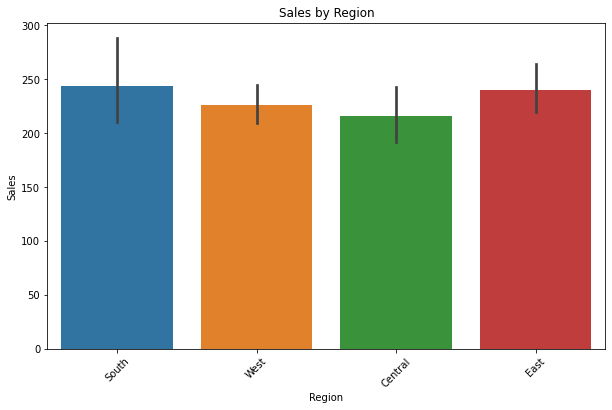

In [25]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales')
plt.title('Sales by Region')
plt.xticks(rotation=45)
plt.show()

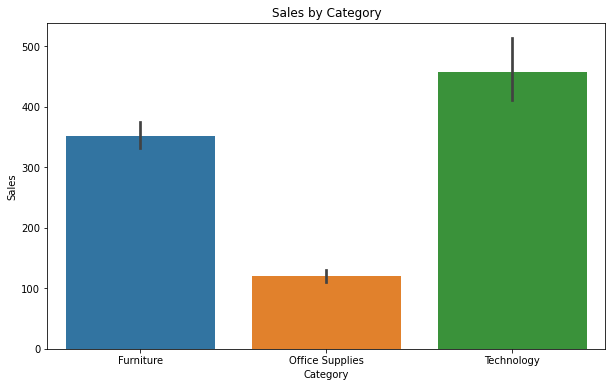

In [26]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

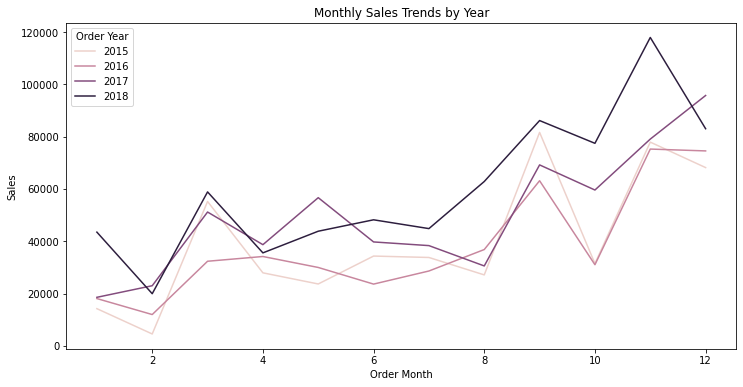

In [27]:
# Monthly sales trend
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales', hue='Order Year')
plt.title('Monthly Sales Trends by Year')
plt.show()

In [29]:
# 7. KEY METRICS AND INSIGHTS
print("\n7. KEY METRICS AND INSIGHTS")
print("-" * 50)

# Calculate key metrics
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
total_orders = df['Order ID'].nunique()
avg_shipping_days = df['Shipping Days'].mean()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sale: ${avg_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Shipping Days: {avg_shipping_days:.1f}")

# 8. SAVE CLEANED DATA
print("\n8. SAVING CLEANED DATASET")
print("-" * 50)

df.to_csv(r'C:\Users\MF\Downloads\Datasets\Datasets\cleaned_sales_data.csv', index=False)
print("Cleaned dataset saved successfully")

# 9. SUMMARY REPORT
print("\n9. SUMMARY REPORT")
print("-" * 50)


7. KEY METRICS AND INSIGHTS
--------------------------------------------------
Total Sales: $2,261,536.78
Average Sale: $230.77
Total Orders: 4922
Average Shipping Days: 4.0

8. SAVING CLEANED DATASET
--------------------------------------------------
Cleaned dataset saved successfully

9. SUMMARY REPORT
--------------------------------------------------


In [30]:
summary_report = {
    'Total Records': len(df),
    'Date Range': f"{df['Order Date'].min()} to {df['Order Date'].max()}",
    'Total Sales': f"${total_sales:,.2f}",
    'Top Region': regional_sales['sum'].idxmax(),
    'Top Category': category_sales['sum'].idxmax(),
    'Data Quality': {
        'Missing Values': missing_values[missing_values > 0].to_dict(),
        'Duplicates': duplicates
    }
}

for key, value in summary_report.items():
    print(f"{key}:")
    print(value)
    print()

Total Records:
9800

Date Range:
2015-01-03 00:00:00 to 2018-12-30 00:00:00

Total Sales:
$2,261,536.78

Top Region:
West

Top Category:
Technology

Data Quality:
{'Missing Values': {'Postal Code': 11}, 'Duplicates': 0}



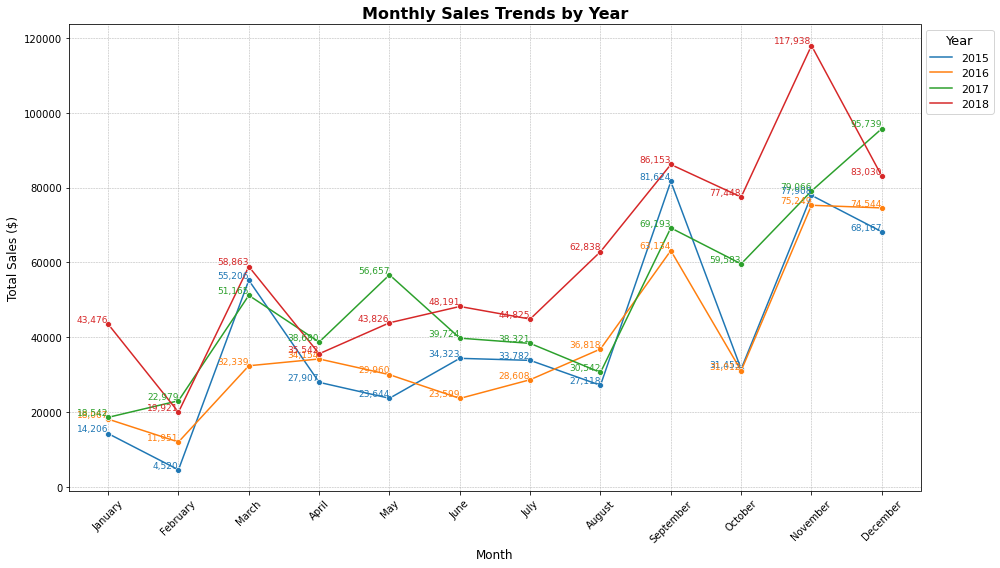

In [31]:
# Enhanced Monthly Sales Trend Visualization
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Create a new column for month names
monthly_sales['Month Name'] = monthly_sales['Order Month'].apply(lambda x: datetime(1900, x, 1).strftime('%B'))

# Sort by month for proper ordering in the plot
monthly_sales['Month Name'] = pd.Categorical(monthly_sales['Month Name'], 
                                             categories=[datetime(1900, i, 1).strftime('%B') for i in range(1, 13)], 
                                             ordered=True)

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month Name', y='Sales', hue='Order Year', marker='o', palette='tab10')

# Add titles and labels
plt.title('Monthly Sales Trends by Year', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Customize legend
plt.legend(title='Year', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Add grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels
for line in plt.gca().get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:,.0f}', color=line.get_color(), fontsize=9, ha='right', va='bottom')

plt.tight_layout()
plt.show()